## Eastern Cape Crime Forecasting
### Anil Abraham 2023

### Importing libraries

In [87]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

### Data preprocessing

In [88]:
df = pd.read_csv('crimedata.csv')

print(f'Null values found\n{df.isna().sum()}') #Check for null values

print(f'\n\n{df.columns}') #List all feature names


Null values found
Crime                  0
Crimes                 0
Police Station         0
Province               0
Crime Category         0
Latitude               0
Longitude              0
Latitude, Longitude    0
Year                   0
dtype: int64


Index(['Crime', 'Crimes', 'Police Station', 'Province', 'Crime Category',
       'Latitude', 'Longitude', 'Latitude, Longitude', 'Year'],
      dtype='object')


#### What does the csv file look like?

In [89]:
df

,Crime,Crimes,Police Station,Province,Crime Category,Latitude,Longitude,"Latitude, Longitude",Year
0,Murder,5,Aberdeen,Eastern Cape,Contact Crimes,-32.476960,24.060513,"-32.4769604, 24.0605132",2010
1,Attempted murder,3,Aberdeen,Eastern Cape,Contact Crimes,-32.476960,24.060513,"-32.4769604, 24.0605132",2010
2,Assault with the intent to inflict grievous bo...,67,Aberdeen,Eastern Cape,Contact Crimes,-32.476960,24.060513,"-32.4769604, 24.0605132",2010
3,Common assault,31,Aberdeen,Eastern Cape,Contact Crimes,-32.476960,24.060513,"-32.4769604, 24.0605132",2010
4,Common robbery,2,Aberdeen,Eastern Cape,Contact Crimes,-32.476960,24.060513,"-32.4769604, 24.0605132",2010
...,...,...,...,...,...,...,...,...,...
345295,Shoplifting,210,Wynberg,Western Cape,Other Serious Crimes,-34.004107,18.464883,"-34.0041069, 18.4648833",2019
345296,Illegal possession of firearms and ammunition,8,Wynberg,Western Cape,Crime detected as a result of Police Action,-34.004107,18.464883,"-34.0041069, 18.4648833",2019
345297,Drug-related crime,581,Wynberg,Western Cape,Crime detected as a result of Police Action,-34.004107,18.464883,"-34.0041069, 18.4648833",2019
345298,Driving under the influence of alcohol or drugs,252,Wynberg,Western Cape,Crime detected as a result of Police Action,-34.004107,18.464883,"-34.0041069, 18.4648833",2019


In [90]:
df['Crime Category'].value_counts()

Contact Crimes                                 69060
Aggravated Robbery                             69060
Property-Related Crimes                        57550
Sexual Offences                                46040
Crime detected as a result of Police Action    46040
Other Serious Crimes                           34530
Contact-Related Crimes                         23020
Name: Crime Category, dtype: int64

#### Features of crimedata.csv are:
<ul>
  <li>Crime (what crime was committed)</li>
  <li>Crimes (How many times a specific crime was committed for that year)</li>
  <li>Police Station (Which station was the crime reported to)</li>
  <li>Province</li>
  <li>Crime Category (Contact, property-related, aggravated robbery, sexual offence, etc)</li>
  <li>Latitude</li>
  <li>Longitude</li>
  <li>Latitude, Longitude</li>
  <li>Year</li>
</ul>

#### Limit provinces to only Eastern Cape

In [91]:
#df = df.drop(['Latitude, Longitude'], axis=1)
df = df[df['Province'] == 'Eastern Cape']
df.to_csv('ECcrimerates.csv', encoding='utf-8', index=False) #Create new csv file with crime information within Eastern Cape only
df_EC = pd.read_csv('ECcrimerates.csv') #Set df equal to the new cleaned CSV.

                                                    Crime Crimes  \
0                                                  Murder      5   
1                                        Attempted murder      3   
2       Assault with the intent to inflict grievous bo...     67   
3                                          Common assault     31   
4                                          Common robbery      2   
...                                                   ...    ...   
316615                                        Shoplifting      0   
316616      Illegal possession of firearms and ammunition      8   
316617                                 Drug-related crime     37   
316618    Driving under the influence of alcohol or drugs     59   
316619  Sexual Offences detected as a result of police...      0   

       Police Station      Province  \
0            Aberdeen  Eastern Cape   
1            Aberdeen  Eastern Cape   
2            Aberdeen  Eastern Cape   
3            Aberdeen  East

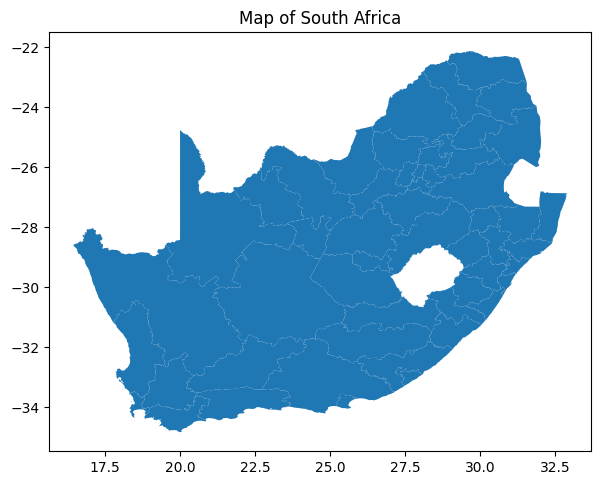

In [92]:
#map = gpd.read_file("C:\\Users\\user-pc\\Desktop\\Downloads\\ZAF_adm\\ZAF_adm2.shp")
map = gpd.read_file("C:\\Users\\user-pc\\Desktop\\Downloads\\gadm41_ZAF_shp\\gadm41_ZAF_2.shp")
fig, ax = plt.subplots(figsize=(7,7))
map.plot(aspect=1,ax = ax)
plt.title('Map of South Africa')
print(df)
plt.show()

In [93]:
df.describe()

,Latitude,Longitude,Year
count,58500.000000,58500.000000,58500.000000
mean,-32.340506,27.094920,2014.500000
std,1.139354,1.409705,2.872306
min,-34.167017,23.152191,2010.000000
25%,-33.149218,26.085341,2012.000000
50%,-32.567986,27.253194,2014.500000
75%,-31.492262,28.052344,2017.000000
max,-25.854560,30.183881,2019.000000


#### After some careful analysis, I found out that there is some incorrect data that has been input. The Police Station 'Doringkloof' does not exist within the Eastern Cape. Doringkloof is a suburb in Gauteng. Therefore, we remove this.

In [94]:
df = df[df['Police Station'] != 'Doringkloof']
df.describe()

,Latitude,Longitude,Year
count,58200.000000,58200.000000,58200.000000
mean,-32.373939,27.089175,2014.500000
std,1.042523,1.411054,2.872306
min,-34.167017,23.152191,2010.000000
25%,-33.149218,26.085341,2012.000000
50%,-32.569626,27.244802,2014.500000
75%,-31.524087,28.000901,2017.000000
max,-30.261515,30.183881,2019.000000


In [95]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
df.drop(['Latitude', 'Longitude', 'Crime', 'Province', 'Crime Category', 'Year'], inplace=True, axis=1)
# for name, group in df.groupby(['Police Station']):
#     print(name)
#     print(group)
#     print('\n')

df = df.groupby(['Police Station'])['Crimes'].agg(Crimes='sum')
print(df)
#df.to_csv('wtf.csv', sep='\t', encoding='utf-8', index=False)

                                                           Crimes
Police Station                                                   
Aberdeen        5367312271001100002201770144443120196040532452...
Addo            1328191552440472622710100105790149624391393014...
Adelaide        5011928510131211320000271393353761177330110519...
Afsondering     5281302214022020000661320217324101531011558222...
Alexandria      4121221231324190320260011535316518217012116612...
...                                                           ...
Willowvale      5212274992439630340201110010310122625978741037...
Wolwefontein    0111401000000000006290111100004700030100200000...
Zamuxolo        2020511311000000020113007160045001120410322000...
Zele            1042065916194810420320017491010537417500043014...
Zwelitsha       2383579913049581114489000612812284203315189411...

[194 rows x 1 columns]


c:\Users\user-pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


7


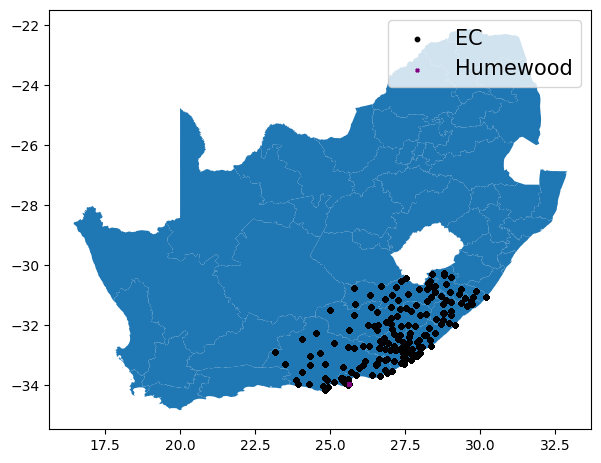

In [96]:
fig, ax = plt.subplots(figsize=(7,7))
map.plot(aspect=1,ax=ax)
geo_df.plot(aspect=1,ax=ax,markersize=10,color='black',marker='o',label='EC')
geo_df[geo_df['Police Station'] == 'Humewood'].plot(aspect=1,ax=ax,markersize=5,color='purple',marker='X',label='Humewood')
plt.legend(prop={'size':15})
print(geo_df['Crime Category'].nunique())

In [97]:
plt.show()

In [98]:
map = gpd.read_file("C:\\Users\\user-pc\\Desktop\\Downloads\\Police_points.shp")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "fiona\ogrext.pyx", line 136, in fiona.ogrext.gdal_open_vector
  File "fiona\_err.pyx", line 291, in fiona._err.exc_wrap_pointer
fiona._err.CPLE_OpenFailedError: Unable to open C:\Users\user-pc\Desktop\Downloads\Police_points.shx or C:\Users\user-pc\Desktop\Downloads\Police_points.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\user-pc\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\user-pc\AppData\Local\Temp\ipykernel_15912\3307693473.py", line 1, in <module>
    map = gpd.read_file("C:\\Users\\user-pc\\Desktop\\Downloads\\Police_points.shp")
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user-pc\AppData\Local\Programs\